In [19]:
# Headers

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp

In [20]:
def calculate_patch_radius(patch_area_sq_degrees):
    return np.arccos(1-patch_area_sq_degrees*np.pi/(2*180*180))

sq_degrees = 250

patch_radius = calculate_patch_radius(sq_degrees)

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


<Figure size 864x864 with 0 Axes>

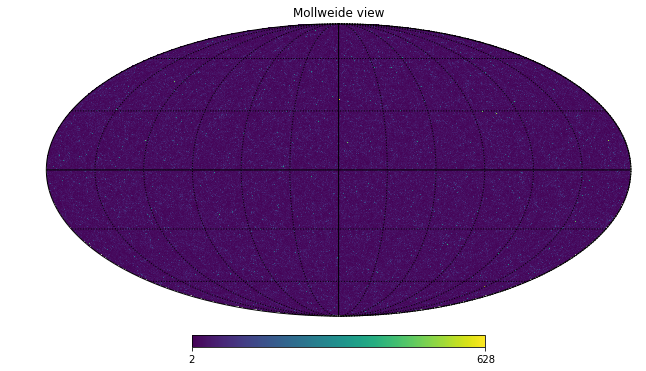

In [21]:
number_field_mice = hp.fitsfunc.read_map('./mice_number_field.fits')

nside = 2048

plt.figure(figsize=(12,12))
hp.mollview(number_field_mice)#, min=-1, max=4)
hp.graticule()

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


<Figure size 864x864 with 0 Axes>

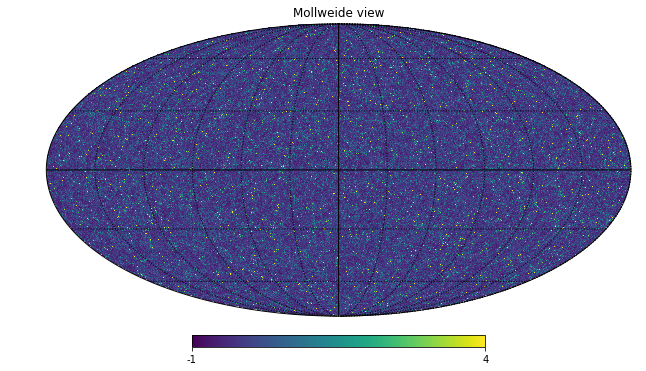

In [22]:
mean_number = np.mean(number_field_mice)
density_field_mice = (number_field_mice - mean_number) / mean_number

plt.figure(figsize=(12,12))
hp.mollview(density_field_mice, min=-1, max=4)
hp.graticule()

Text(0.5, 1.0, '1-pt PDF density fluctuations mice map (single patch 250 sq. degrees)')

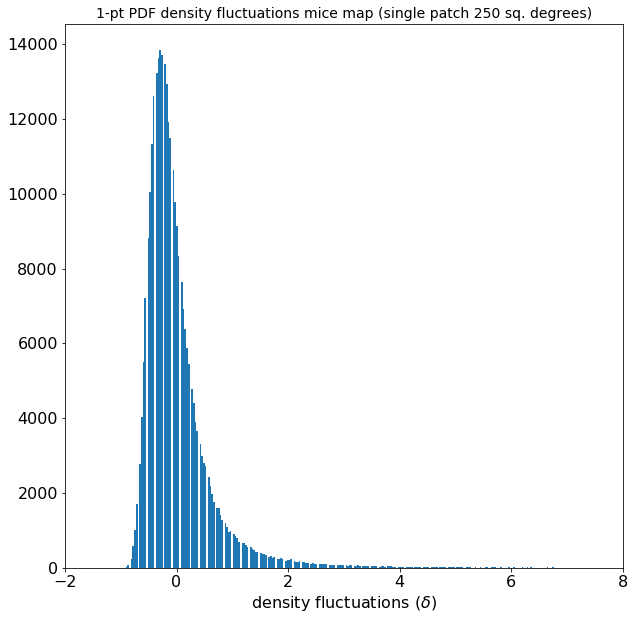

In [23]:
disc_center = hp.pix2vec(nside, 1010101)

# radius (in radians) corresponding to area of spherical cap in sky

# find the pixels 
pixels_indices_disc = hp.query_disc(nside, disc_center, patch_radius)

density_field_mice_disc = density_field_mice[pixels_indices_disc]

# 1-pt PDF of density fluctuations within patch

plt.figure(figsize=(10,10))
plt.hist(density_field_mice_disc, bins=800)
plt.xlabel('density fluctuations ($δ$)', fontsize=16)
plt.tick_params(labelsize=16)
plt.xlim(-2,8)
plt.title('1-pt PDF density fluctuations mice map (single patch '+str(sq_degrees)+' sq. degrees)', fontsize=14)

In [10]:
cl = hp.sphtfunc.anafast(density_field_mice)

In [11]:
l = np.arange(0,cl.size,1)

Text(0.5, 1.0, "Angular Power spectrum ($C_l$'s from halofit)")

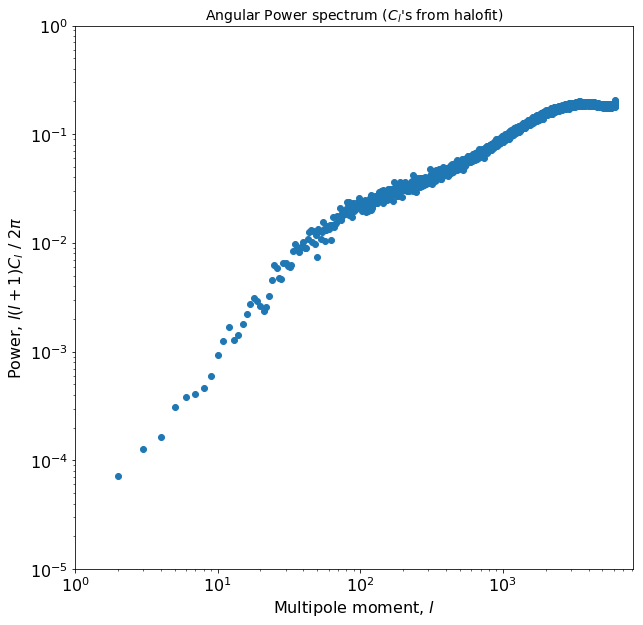

In [30]:
plt.figure(figsize=(10,10))

plt.scatter(l, l*(l+1)*cl/(2*np.pi))
plt.yscale('log')
plt.xscale('log')
plt.xlim(1,8192)
plt.ylim(1e-5,1)
plt.xlabel('Multipole moment, $l$', fontsize=16)
plt.ylabel('Power, $l(l+1)C_l$ / $2π$', fontsize=16)
plt.tick_params(labelsize=16)
plt.title('Angular Power spectrum ($C_l$\'s from mice map using healpy), fontsize=14)